In [1]:
#Google Stock Price prediction using RNN 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To read traing data of google share price 
df=pd.read_csv('Google_Stock_Price_Train.csv')
#training_set user defined dataframe
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
df['Date'].min()

'1/10/2012'

In [4]:
df['Date'].max()

'9/9/2016'

In [5]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
df[["Date","Open"]].head()

,Date,Open
0,2012-01-03,325.25
1,2012-01-04,331.27
2,2012-01-05,329.83
3,2012-01-06,328.34
4,2012-01-09,322.04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   object        
 5   Volume  1258 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 59.1+ KB


In [9]:
#To check null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
'''
X (Open)    Y(o/p)
325.25      331.27 
331.27      329.83
329.83      328.34
328.34        :
:

'''

'\nX (Open)    Y(o/p)\n325.25      331.27 \n331.27      329.83\n329.83      328.34\n328.34        :\n:\n\n'

In [11]:
#separate Open column from given dataset 
df1=df.iloc[:,1:2].values #or df1=df['Open']  df.loc[:,'Open']
#1:2 means start=1 and stop=2-1=1
type(df1)

numpy.ndarray

In [12]:
df1.ndim

2

In [13]:
#Feature Scaling is the most important part of data preprocessing 
#Stock market data : low -high 
#Mostly apply Normalisation : means minmaxscaler
from sklearn.preprocessing import MinMaxScaler

In [14]:
#create object of MinMaxScaler class
mms=MinMaxScaler()
df1=mms.fit_transform(df1)

In [15]:
df1

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [16]:
#Find the total number of records 
df1.shape

(1258, 1)

In [17]:
#separate Input and output from Open column 
X_train=df1[0:1257] #start=0 steop=1258-1=1257 
Y_train=df1[1:1258] 

In [18]:
X_train.shape

(1257, 1)

In [19]:
Y_train.shape

(1257, 1)

In [20]:
#3 Dimension 

In [21]:
X_train.ndim

2

In [22]:
#no. of rows ,no. of columns,time stamp 
#1257,1,1
#next step : we have going to reshape of our data 
#3 dimensional data should be required .
#first dimension show no. of rows means here 1257 rows 
#second dimension : show no. of columns means no. of features(input) :here 1
#third dimension : corresponds to a timestamp 
#because our input is t (current) and output is t+1(next day). so that 
#time stamp =t+1-t=1 .its represent time stamp
#suppose stock price after 4 days means we predict output t+4 means 
#time stamp=t+4-t=4
#We provide 3D data then we converts our input X_train data into 3D 
X_train=np.reshape(X_train,(1257,1,1))

In [23]:
#To check dimension
X_train.ndim

3

In [24]:
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [25]:
#Part-2 : -
#Building the RNN with LSTM 
#Recurrent neural network 
#LSTM means long short term memory 
from tensorflow.keras.models import Sequential #initialise neural network
from tensorflow.keras.layers import Dense #to add input layer,output layer,
#and hidden layer
from tensorflow.keras.layers import LSTM  #to use built the model 
#LSTM : to manage internal memory , to store previous o/p 
#long short term memory 


2022-08-21 13:18:29.921052: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 13:18:29.921080: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [26]:
#We have regression problem means our output is contineous numeric value 
#means to predict contineous numeric value  means this is regression problem 

In [27]:
#create objecgt of Sequential class
model=Sequential()

2022-08-21 13:18:31.421963: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-21 13:18:31.422006: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-21 13:18:31.422039: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (desktop): /proc/driver/nvidia/version does not exist


In [28]:
#To add layers in model
#This layer are input layer and LSTM layer 
model.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))
#None means to take no. of rows and 1 means 1 column

#To add output layer 
model.add(Dense(units=1,activation='linear'))

In [29]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')

In [30]:
#early stopping 
from tensorflow.keras.callbacks import EarlyStopping
#procedure for callback(EarlyStopping)
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [31]:
#Train the model
trained_model=model.fit(X_train,Y_train,batch_size=10,epochs=75)
                      # validation_split=0.2,callbacks=callback)
#validation_split=0.2 means 20% data of training data X_train
#80% for training and 20% for validation 

Epoch 1/75
126/126 [==============================] - 1s 1ms/step - loss: 0.0803
Epoch 2/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0700
Epoch 3/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0643
Epoch 4/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0588
Epoch 5/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0535
Epoch 6/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 7/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0432
Epoch 8/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 9/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0331
Epoch 10/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 11/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 12/75
126/126 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 13/75
126/126 [====

In [35]:
#Test the model : -
#Part-3 : -Making the prediction and visualizing the result 
#Required Testing Data : We have Google_stock_price_test.csv for testing data 
test_df=pd.read_csv('Google_Stock_Price_Test.csv')
#to show first 5 records
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [36]:
test_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [37]:
test_df['Date']=pd.to_datetime(test_df['Date'])
test_df.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2,2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
3,2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
4,2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [38]:
#separate Open column from given testing dataset 
test_df1=test_df.iloc[:,1:2].values #or df1=df['Open']  df.loc[:,'Open']
#1:2 means start=1 and stop=2-1=1
test_df1

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [39]:
#Apply Normalised (minmaxscaler) on test_df1 (input)
#only transform() on testing data
test_df1=mms.transform(test_df1)

In [40]:
len(test_df1)

20

In [41]:
test_df1.ndim

2

In [42]:
#convert our testing input into 3 D
test_df1=np.reshape(test_df1,(20,1,1))

In [43]:
test_df1.ndim

3

In [44]:
test_df1

array([[[0.92955205]],

       [[0.94731751]],

       [[0.94307612]],

       [[0.96015329]],

       [[0.98087655]],

       [[0.98359253]],

       [[0.97827219]],

       [[0.98225314]],

       [[0.98288563]],

       [[0.98214153]],

       [[0.979779  ]],

       [[0.97849542]],

       [[0.98182528]],

       [[0.98245777]],

       [[1.01045465]],

       [[1.02407173]],

       [[1.03930724]],

       [[1.03354044]],

       [[0.99624228]],

       [[0.9631297 ]]])

In [45]:
Y_pred=model.predict(test_df1) #test
Y_pred

1/1 [==============================] - 0s 180ms/step


array([[0.9225699 ],
       [0.9379405 ],
       [0.9342904 ],
       [0.94891155],
       [0.96638274],
       [0.9686501 ],
       [0.9642035 ],
       [0.96753263],
       [0.9680606 ],
       [0.96743953],
       [0.96546495],
       [0.96439064],
       [0.96717525],
       [0.96770346],
       [0.99079394],
       [1.0018216 ],
       [1.0140011 ],
       [1.009411  ],
       [0.97914195],
       [0.95143926]], dtype=float32)

In [46]:
#To remove scaling on Y_pred  , use inverse_transform which are define
#in MinMAxScaler class
Y_pred=mms.inverse_transform(Y_pred)
Y_pred

array([[775.05664],
       [783.3193 ],
       [781.3571 ],
       [789.21686],
       [798.6087 ],
       [799.8275 ],
       [797.4372 ],
       [799.2268 ],
       [799.5106 ],
       [799.17676],
       [798.1153 ],
       [797.5378 ],
       [799.0347 ],
       [799.31866],
       [811.73114],
       [817.65924],
       [824.2064 ],
       [821.73895],
       [805.4675 ],
       [790.5757 ]], dtype=float32)

In [47]:
test_df1

array([[[0.92955205]],

       [[0.94731751]],

       [[0.94307612]],

       [[0.96015329]],

       [[0.98087655]],

       [[0.98359253]],

       [[0.97827219]],

       [[0.98225314]],

       [[0.98288563]],

       [[0.98214153]],

       [[0.979779  ]],

       [[0.97849542]],

       [[0.98182528]],

       [[0.98245777]],

       [[1.01045465]],

       [[1.02407173]],

       [[1.03930724]],

       [[1.03354044]],

       [[0.99624228]],

       [[0.9631297 ]]])

In [48]:
real_df=test_df.iloc[:,1:2].values   # To get actual provided values of only Date column

In [49]:
real_df

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [50]:
Y_pred.shape

(20, 1)

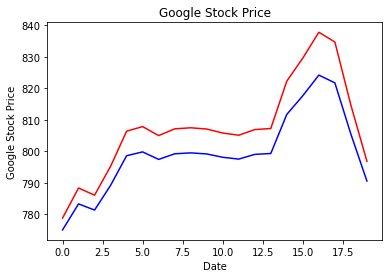

In [51]:
# for compare Actual value Stock Price and Predicted Stock price,
# Use Visualisation
plt.plot(real_df,color='red',label='Actual Stock Price')
plt.plot(Y_pred,color='blue',label='Predicterd Stock Price')
plt.title('Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.show()

In [52]:
# Evaluation of model: find r2_score
from sklearn.metrics import r2_score          
r2_score(real_df,Y_pred)

0.6680268751749915

In [55]:
# Predict next dat stock price
n=float(input('Enter Today Opening Stock Price :'))
# here n is scaler variable 
# print(type(n))
# First, convert n into 2D numpy array
n=np.array(n).reshape(-1,1)   # here -1 means None means automatic accept no. or rows but next 1 means no. of column
#print(type(n))
#print(n.ndim)
# Apply scaling : normalisation means MinMaxScaler
n1=mms.transform(n)
#print(n1)
# converts n1 from 2D into 3D array
v=n1.reshape(-1,1,1)
# print(v)
# prediction
pred=model.predict(v)
# print(pred)
# to remove scaling
final=mms.inverse_transform(pred)
print('Opening Price of Next day: ',final)

Enter Today Opening Stock Price :135
1/1 [==============================] - 0s 17ms/step
Opening Price of Next day:  [[180.0964]]


In [54]:
# If we want to predict stock price of next 5 day's , then we use for loop

n=float(input('Enter Today Opening Stock Price :'))
# here n is scaler variable 
# print(type(n))
# First, convert n into 2D numpy array
n=np.array(n).reshape(-1,1)
days=int(input('Enter How many days'))
for i in range(days):
  n=np.array(n).reshape(-1,1)   # here -1 means None means automatic accept no. or rows but next 1 means no. of column
  # Apply scaling : normalisation means MinMaxScaler
  n1=mms.transform(n)
  # converts n1 from 2D into 3D array
  v=n1.reshape(-1,1,1)
  # prediction
  pred=model.predict(v)
  # to remove scaling
  final=mms.inverse_transform(pred)
  print('Opening Price of Next day: ',final)
  n=final

Enter Today Opening Stock Price :135
Enter How many days5
1/1 [==============================] - 0s 25ms/step
Opening Price of Next day:  [[180.0964]]
1/1 [==============================] - 0s 16ms/step
Opening Price of Next day:  [[209.88419]]
1/1 [==============================] - 0s 17ms/step
Opening Price of Next day:  [[231.2086]]
1/1 [==============================] - 0s 16ms/step
Opening Price of Next day:  [[247.2826]]
1/1 [==============================] - 0s 16ms/step
Opening Price of Next day:  [[259.8414]]
